<a href="https://colab.research.google.com/github/hungsvdut2k2/ML_Fundamentals/blob/main/ImageRetrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Crawl Data**

In [1]:
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse
import urllib.request
import time
from threading import Thread
import os


In [2]:
!zip -r /content/images.zip /content/images

	zip warning: name not matched: /content/images

zip error: Nothing to do! (try: zip -r /content/images.zip . -i /content/images)


In [3]:
class GetImagesfromPages():
    def __init__(self, nThreads, npage, url_page):
        self.nThreads = nThreads
        self.npage = npage
        self.url_page = url_page

        self.result_urls = []
    
    def is_valid(self, url):
        """
        Checks whether `url` is a valid URL.
        """
        parsed = urlparse(url)
        return bool(parsed.netloc) and bool(parsed.scheme)
    
    def get_all_images(self, url):
        """
        Returns all image URLs on a single `url`
        """
        soup = BeautifulSoup(urllib.request.urlopen(url), "html.parser")
        urls = []
        for img in soup.find_all("img"):
            img_url = img.attrs.get("src")

            if not img_url:
                # if img does not contain src attribute, just skip
                continue

            # make the URL absolute by joining domain with the URL that is just extracted
            img_url = urljoin(url, img_url)
            # remove URLs like '/hsts-pixel.gif?c=3.2.5'
            try:
                pos = img_url.index("?")
                img_url = img_url[:pos]
            except ValueError:
                pass

            # finally, if the url is valid
            if self.is_valid(img_url):
                urls.append(img_url)

        return urls
    
    # Func target
    def main(self, start, end):
        
        for i in range(start,end):
            try:
                self.result_urls.extend(self.get_all_images(self.url_page + str(i)))
            except:
                pass
        
    def __call__(self):
        
        # Create Threads
        threads = []
        
        batch = self.npage//self.nThreads
        for i in range(0, self.npage, batch):
            start = i
            end = i + batch
           
            if end >= self.npage:
                end = self.npage + 1

            threads.append(Thread(target=self.main, args = (start, end)))
        
        start = time.time()
        for i in range(self.nThreads):
            threads[i].start()
        for i in range(self.nThreads):
            threads[i].join()
        end = time.time()
        
        print(f"Time handle pages = {end - start:.2f}s", )
    
        return self.result_urls

In [4]:
def urls_to_txts(topic_names, topics, urltopic, n_page, n_threads):
    for dir, names in zip(topic_names, topics):
        dir_path_urls = f"data/{dir}/urls"
        if not os.path.exists(dir_path_urls):
            os.makedirs(dir_path_urls)

        for name in names:
            result_of_name = []
            for key in urltopic.keys():
                res = GetImagesfromPages(min(n_threads, n_page//2), n_page, 
                                urltopic[key].format(name = name))()
                
                if len(res) > 0:
                    res = list(set(res))
                    result_of_name.extend(res)

            print(f"{dir_path_urls}/{dir}_{name}.txt have {len(result_of_name)} images \n")
            strResult = '\n'.join(result_of_name)
            with open(f"{dir_path_urls}/{dir}_{name}.txt", "w") as f:
                f.write(strResult)

In [5]:
animal  =  ["Monkey",  "Elephant",  "cows",  
"Cat",  "Dog",  "bear",  "fox",  "Civet", 
"Pangolins", "Rabbit", "Bats", "Whale", 
"Cock", "Owl", "flamingo", "Lizard", "Turtle", 
"Snake", "Frog", "Fish", "shrimp", "Crab", "Snail", 
"Coral", "Jellyfish", "Butterfly", "Flies", "Mosquito", 
"Ants", "Cockroaches", "Spider", "scorpion", "tiger", 
"bird",  "horse", "pig", "Alligator" ,"Alpaca" , 
"Anteater", "donkey", "Bee", "Buffalo", "Camel", 
"Caterpillar", "Cheetah", "Chicken",  "Dragonfly", 
"Duck", "panda", "Giraffe"]

plant = ["Bamboo", "Apple", "Apricot", "Banana", "Bean", 
"Wildflower", "Flower", "Mushroom", "Weed", "Fern" , "Reed", 
"Shrub", "Moss", "Grass", "Palmtree", "Corn", "Tulip", "Rose",
"Clove", "Dogwood", "Durian", "Ferns", "Fig", "Flax", "Frangipani", 
"Lantana", "Hibiscus", "Bougainvillea", "Pea", "OrchidTree", "RangoonCreeper",
"Jackfruit", "Cottonplant", "Corneliantree", "Coffeeplant", "Coconut"
, "wheat", "watermelon", "radish", "carrot"]

furniture = ["bed", "cabinet", "chair", "chests", "clock", 
"desks", "table", "Piano", "Bookcase", "Umbrella", "Clothes", 
"cart", "sofa", "ball", "spoon", "Bowl", "fridge", "pan", "book"]

scenery = ["Cliff", "Bay", "Coast", "Mountains", "Forests", 
"Waterbodies", "Lake", "desert", "farmland", "river", "hedges", 
"plain", "sky", "cave", "cloud", "flowergarden", "glacier", 
"grassland", "horizon", "lighthouse", "plateau", "savannah", "valley", "volcano", "waterfall"]

urltopic = {
    "freeimages": "https://www.freeimages.com/search/{name}/"
}


In [6]:
urltopic = {
    "freeimages": "https://www.freeimages.com/search/{name}/"
}

topic_names = ["animal", "plant", "furniture", "scenery"]
topics = [animal, plant, furniture, scenery]
n_threads = 3
n_page = 6

In [7]:
urls_to_txts(topic_names=topic_names, topics=topics, urltopic=urltopic, n_page=n_page, n_threads=n_threads)

Time handle pages = 0.74s
data/animal/urls/animal_Monkey.txt have 77 images 

Time handle pages = 0.71s
data/animal/urls/animal_Elephant.txt have 77 images 

Time handle pages = 0.67s
data/animal/urls/animal_cows.txt have 369 images 

Time handle pages = 0.65s
data/animal/urls/animal_Cat.txt have 77 images 

Time handle pages = 0.69s
data/animal/urls/animal_Dog.txt have 77 images 

Time handle pages = 0.80s
data/animal/urls/animal_bear.txt have 377 images 

Time handle pages = 0.67s
data/animal/urls/animal_fox.txt have 347 images 

Time handle pages = 0.33s
data/animal/urls/animal_Civet.txt have 24 images 

Time handle pages = 0.32s
data/animal/urls/animal_Pangolins.txt have 9 images 

Time handle pages = 0.63s
data/animal/urls/animal_Rabbit.txt have 77 images 

Time handle pages = 0.69s
data/animal/urls/animal_Bats.txt have 77 images 

Time handle pages = 0.72s
data/animal/urls/animal_Whale.txt have 77 images 

Time handle pages = 0.73s
data/animal/urls/animal_Cock.txt have 77 images 

In [8]:
import urllib.request
from threading import Thread
import time
import requests
import random
import os

class DownloadImagesFromUrls():
    def __init__(self, nThreads, urls, destinate_folder):
        self.nThreads = nThreads
        self.urls = urls
        self.n = len(urls)
        self.destinate_folder = destinate_folder
    # Func target
    def download_url(self, start, end):

        for i in range(start, end):
            a = random.random()
            try:
                urllib.request.urlretrieve(self.urls[i], f"{self.destinate_folder}/{a}.jpg")
            except:
                print(f"cannot access {self.urls[i]}")
            print('.', end=" ")         
                 
    def __call__(self):

        threads = []
        batch = self.n//self.nThreads
        for i in range(0, self.n, batch):
            start = i
            end = i + batch

            if end >= self.n:
                end = self.n 

            threads.append(Thread(target=self.download_url, args = (start, end)))

        start = time.time()
        for i in range(self.nThreads):
            threads[i].start()
        for i in range(self.nThreads):
            threads[i].join() 
        end = time.time()

        print(f"\nTime handle download urls = {end - start:.2f}s\n", )


In [9]:
def get_image_from_txts(topic_names, topics):
    for dir, names in zip(topic_names, topics):

        dir_path_images = f"images"
        dir_path_urls = f"data/{dir}/urls"
        if not os.path.exists(dir_path_images):
            os.makedirs(dir_path_images)

        txts = [name for name in os.listdir(dir_path_urls) if name.endswith(".txt")]

        for txt in txts:
            folder_txt = f"{dir_path_urls}/{txt}"
            with open(folder_txt, "r") as f:
                content_txt = f.readlines()

            folder_image = f"{dir_path_images}/{txt}"
            if not os.path.exists(folder_image[:-4]):
                os.makedirs(folder_image[:-4])
            print(folder_image[:-4])
            
            n_threads = 10
            DownloadImagesFromUrls(min(n_threads, len(content_txt)//2), content_txt, folder_image[:-4])()

In [10]:
animal  =  ["Monkey",  "Elephant",  "cows",  
"Cat",  "Dog",  "bear",  "fox",  "Civet", 
"Pangolins", "Rabbit", "Bats", "Whale", 
"Cock", "Owl", "flamingo", "Lizard", "Turtle", 
"Snake", "Frog", "Fish", "shrimp", "Crab", "Snail", 
"Coral", "Jellyfish", "Butterfly", "Flies", "Mosquito", 
"Ants", "Cockroaches", "Spider", "scorpion", "tiger", 
"bird",  "horse", "pig", "Alligator" ,"Alpaca" , 
"Anteater", "donkey", "Bee", "Buffalo", "Camel", 
"Caterpillar", "Cheetah", "Chicken",  "Dragonfly", 
"Duck", "panda", "Giraffe"]

plant = ["Bamboo", "Apple", "Apricot", "Banana", "Bean", 
"Wildflower", "Flower", "Mushroom", "Weed", "Fern" , "Reed", 
"Shrub", "Moss", "Grass", "Palmtree", "Corn", "Tulip", "Rose",
"Clove", "Dogwood", "Durian", "Ferns", "Fig", "Flax", "Frangipani", 
"Lantana", "Hibiscus", "Bougainvillea", "Pea", "OrchidTree", "RangoonCreeper",
"Jackfruit", "Cottonplant", "Corneliantree", "Coffeeplant", "Coconut"
, "wheat", "watermelon", "radish", "carrot"]

furniture = ["bed", "cabinet", "chair", "chests", "clock", 
"desks", "table", "Piano", "Bookcase", "Umbrella", "Clothes", 
"cart", "sofa", "ball", "spoon", "Bowl", "fridge", "pan", "book"]

scenery = ["Cliff", "Bay", "Coast", "Mountains", "Forests", 
"Waterbodies", "Lake", "desert", "farmland", "river", "hedges", 
"plain", "sky", "cave", "cloud", "flowergarden", "glacier", 
"grassland", "horizon", "lighthouse", "plateau", "savannah", "valley", "volcano", "waterfall"]

In [11]:
topic_names = ["animal", "plant", "furniture", "scenery"]
topics = [animal, plant, furniture, scenery]
get_image_from_txts(topic_names=topic_names, topics=topics)

images/animal_scorpion
. . . . . . . . . . . . . . . . . . . . ..  . . . ..  . . ..  . . . ..  . . . . . . . . . . . . . . . . . . . . . . . ..  ..  ...  .  . ..  . . ..  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 0.58s

images/animal_Anteater
..  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ..  . . . . ..  . . . . . . . . . . . . . . . . . . 
Time handle download urls = 0.57s

images/animal_Bats
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 0.52s

images/animal_Giraffe
. . . .. .  . . ..  . ...   . . . . . . . ..  . ..  . . . . . . . . . . . . . . . . . . . . .. . .  . . . . . . . . . . . . . . . . . . . . 
Time handle download urls = 0.31s

images/animal_Crab
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ..  

**2. Data Preprocessing**

In [13]:
import os
from PIL import Image
import numpy as np
import warnings
warnings.filterwarnings("ignore", "(Possibly )?corrupt EXIF data", UserWarning)
Image.MAX_IMAGE_PIXELS = None

In [14]:
images_path = "images/"
dic_categories = {'animal' : [], 'plant' : [], 'furniture' : [], 'scenery' : []}
count = 0

In [15]:
for folder in os.listdir(images_path):
    if folder.split("_")[0] in dic_categories:
        path = images_path + folder
        list_dir = [path + '/' + name for name in os.listdir(path) if name.endswith((".jpg", ".png", ".jpeg"))]
        for p in list_dir:
            try:
                img = Image.open(p).resize((224, 224))
                
                if img.width < 10:
                    print("Image too small: ", p)
                    os.remove(p)

                img.verify()
                

            except Exception:
                count += 1
                print("error: ", p)
                os.remove(p)

error:  images/scenery_flowergarden/0.5763273343509762.jpg
error:  images/scenery_flowergarden/0.1646282589193303.jpg
error:  images/scenery_flowergarden/0.5685655195862631.jpg
error:  images/scenery_flowergarden/0.30824618756508126.jpg
error:  images/scenery_flowergarden/0.7412688574025725.jpg
error:  images/scenery_flowergarden/0.2924265157382271.jpg
error:  images/scenery_flowergarden/0.08665484818684377.jpg
error:  images/scenery_flowergarden/0.9241257984250909.jpg
error:  images/plant_Fig/0.3348139515496287.jpg
error:  images/plant_Fig/0.1655948042116212.jpg
error:  images/plant_Fig/0.2980923902875334.jpg
error:  images/plant_Fig/0.9803651185235462.jpg
error:  images/plant_Fig/0.6277105074034308.jpg
error:  images/plant_Fig/0.015705086217762454.jpg
error:  images/plant_Fig/0.5947523462257975.jpg
error:  images/plant_Fig/0.8098161776657838.jpg
error:  images/plant_Fig/0.14640185360848723.jpg
error:  images/plant_Fig/0.2005702267514552.jpg
error:  images/plant_Fig/0.5833513039044862

**3.Experiment Methods**

In [18]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

def read_image_from_path(path, size):
    im = Image.open(path).resize(size)
    return np.asarray(im, dtype=np.float32)

def folder_to_images(folder, size=(224, 224)):
    
    list_dir = [folder + '/' + name for name in os.listdir(folder) if name.endswith((".jpg", ".png", ".jpeg"))]
    
    i = 0
    images_np = np.zeros(shape=(len(list_dir), *size, 3))
    images_path = []
    for path in list_dir:
        try:
            images_np[i] = read_image_from_path(path, size)
            images_path.append(path)
            i += 1
            
        except Exception:
            print("error: ", path)
#             os.remove(path)

    images_path = np.array(images_path)
    return images_np, images_path

In [27]:
root_img_path = "images/"
dic_categories = ['scenery', 'furniture', 'animal', 'plant']
query_path = "index.jpeg"
size = (224, 224)

In [28]:
query = read_image_from_path(query_path, size)

In [29]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

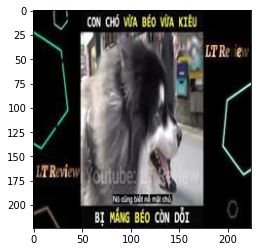

In [30]:
plt.imshow(query/255.0);

**3.1 Cosine Similarity**

In [25]:
def cosine_similarity(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    # Ứng dụng norm
    query_norm = np.sqrt(np.sum(query**2))
    X_norm = np.sqrt(np.sum(X**2, axis=axis_batch_size))
    return np.sum(X * query, axis=axis_batch_size) / (query_norm*X_norm + np.finfo(float).eps)

In [31]:
%%time
ls_path_score = []
for folder in os.listdir(root_img_path)[:100]:
    if folder.split("_")[0] in dic_categories:
        path = root_img_path + folder
        images_np, images_path = folder_to_images(path)
        rates = cosine_similarity(query, images_np)
        ls_path_score.extend(list(zip(images_path, rates)))

error:  images/animal_Monkey/0.18641775535055882.jpg
error:  images/animal_Dog/0.7839387198829634.jpg
error:  images/furniture_Bowl/0.5277407926356773.jpg
error:  images/animal_pig/0.6339072458606301.jpg
error:  images/animal_pig/0.541515104291552.jpg
error:  images/animal_pig/0.6046232285134561.jpg
error:  images/animal_pig/0.44067364262367237.jpg
error:  images/animal_pig/0.38432570483040784.jpg
error:  images/animal_pig/0.5997615493184588.jpg
error:  images/animal_shrimp/0.16653920981116155.jpg
error:  images/animal_shrimp/0.221662644767188.jpg
error:  images/animal_shrimp/0.04764697162065834.jpg
error:  images/animal_shrimp/0.8729316062467413.jpg
error:  images/animal_shrimp/0.3553854887307222.jpg
error:  images/animal_shrimp/0.9044897769158774.jpg
error:  images/animal_shrimp/0.10988642980145735.jpg
error:  images/animal_shrimp/0.05370137006684661.jpg
error:  images/animal_shrimp/0.35528549753673333.jpg
error:  images/animal_shrimp/0.8874039843807499.jpg
error:  images/animal_shri

In [32]:
len(ls_path_score)

14432

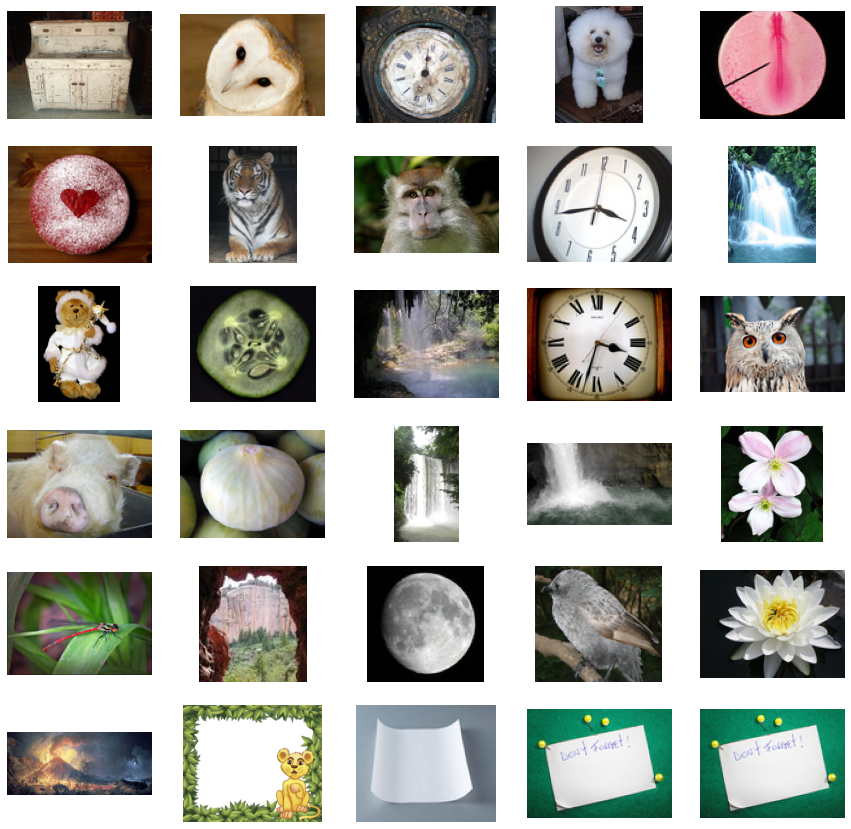

In [33]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1], reverse = True)[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

**3.2 Correlation Coefficient**

In [35]:
def correlation_coefficient(query, X):
    
    axis_batch_size = tuple(range(1,len(X.shape)))
    
    query_mean = query - np.mean(query)
    X_mean = X - np.mean(X, axis=axis_batch_size, keepdims=True)
    
    query_norm = np.sqrt(np.sum(query_mean**2))
    X_norm = np.sqrt(np.sum(X_mean**2, axis=axis_batch_size))
    
    return np.sum(X_mean * query_mean, axis=axis_batch_size) / (query_norm*X_norm + np.finfo(float).eps)

In [36]:
%%time
ls_path_score = []
for folder in os.listdir(root_img_path)[:100]:
    if folder.split("_")[0] in dic_categories:
        path = root_img_path + folder
        images_np, images_path = folder_to_images(path)
        rates = correlation_coefficient(query, images_np)
        ls_path_score.extend(list(zip(images_path, rates)))

error:  images/animal_Monkey/0.18641775535055882.jpg
error:  images/animal_Dog/0.7839387198829634.jpg
error:  images/furniture_Bowl/0.5277407926356773.jpg
error:  images/animal_pig/0.6339072458606301.jpg
error:  images/animal_pig/0.541515104291552.jpg
error:  images/animal_pig/0.6046232285134561.jpg
error:  images/animal_pig/0.44067364262367237.jpg
error:  images/animal_pig/0.38432570483040784.jpg
error:  images/animal_pig/0.5997615493184588.jpg
error:  images/animal_shrimp/0.16653920981116155.jpg
error:  images/animal_shrimp/0.221662644767188.jpg
error:  images/animal_shrimp/0.04764697162065834.jpg
error:  images/animal_shrimp/0.8729316062467413.jpg
error:  images/animal_shrimp/0.3553854887307222.jpg
error:  images/animal_shrimp/0.9044897769158774.jpg
error:  images/animal_shrimp/0.10988642980145735.jpg
error:  images/animal_shrimp/0.05370137006684661.jpg
error:  images/animal_shrimp/0.35528549753673333.jpg
error:  images/animal_shrimp/0.8874039843807499.jpg
error:  images/animal_shri

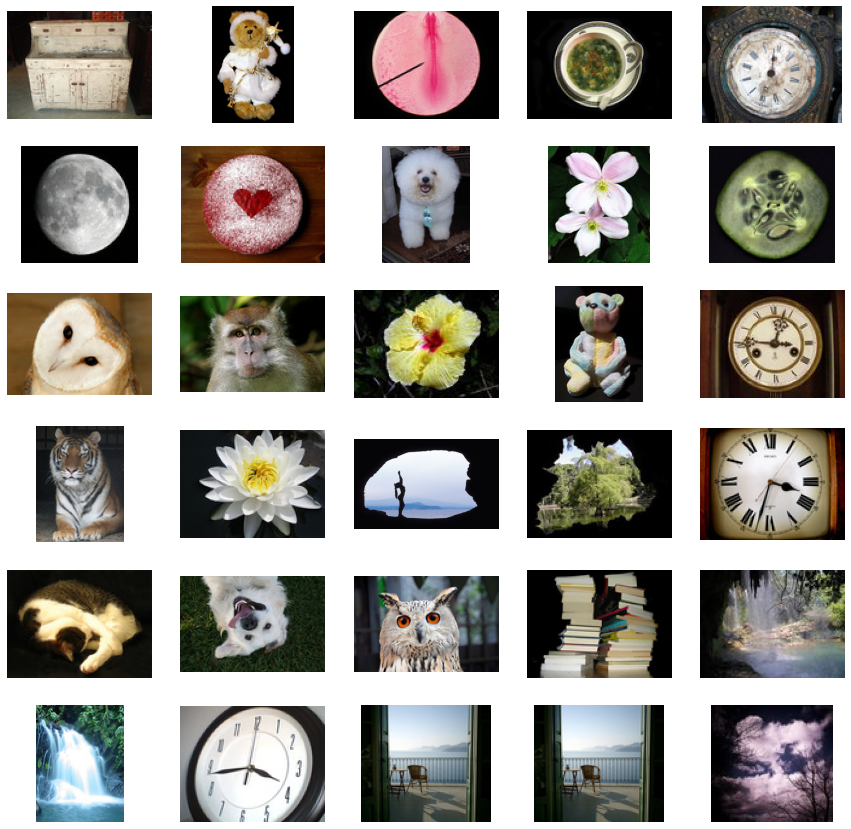

In [37]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1], reverse = True)[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()